mount google drive to restore the data even after colab session is expired

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


linking kaggle with colab

In [ ]:
! pip install -q kaggle

Choose the kaggle.json file that you downloaded

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niladrisarkhel","key":"278bd3abbc17e30ce35a255085fc39fd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           4042         94  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          10880        235  0.9411765        
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           2801         38  1.0              
abdullah0a/retail-sales-data-with-seasonal-trends-and-m

In [ ]:
!kaggle datasets download -d ashwingupta3012/Male-and-female-faces-dataset

Dataset URL: https://www.kaggle.com/datasets/ashwingupta3012/Male-and-female-faces-dataset
License(s): CC0-1.0
 99% 1.62G/1.63G [00:24<00:00, 160MB/s]
100% 1.63G/1.63G [00:24<00:00, 72.6MB/s]


In [ ]:
!unzip Male-and-female-faces-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Male and Female face dataset/Female Faces/0 (1367).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1368).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1369).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (137).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1370).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1371).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1372).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1373).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1374).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1375).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1376).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1377).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1378).jpg  
  inflating: Male and Female face datase

moving the dataset from colab session to google drive

In [ ]:
!cp -r "/content/Male and Female face dataset" /content/drive/MyDrive/datasets/images/

Verify the dataset directory


In [ ]:
import os

# Verify the dataset directory
dataset_dir = '/content/drive/MyDrive/datasets/images/Male and Female face dataset'

# Check if the directories exist
if os.path.exists(dataset_dir):
    print("Dataset directory found!")
    print(os.listdir(dataset_dir))  # List the contents of the directory
else:
    print("Dataset directory not found!")

Dataset directory found!
['Female Faces', 'Male Faces']


visualize all the image dimensions

Female Widths: [3539, 948, 400, 800, 350]
Female Heights: [5309, 1291, 339, 582, 431]
Male Widths: [1066, 500, 429, 960, 961]
Male Heights: [1600, 750, 527, 1280, 1200]


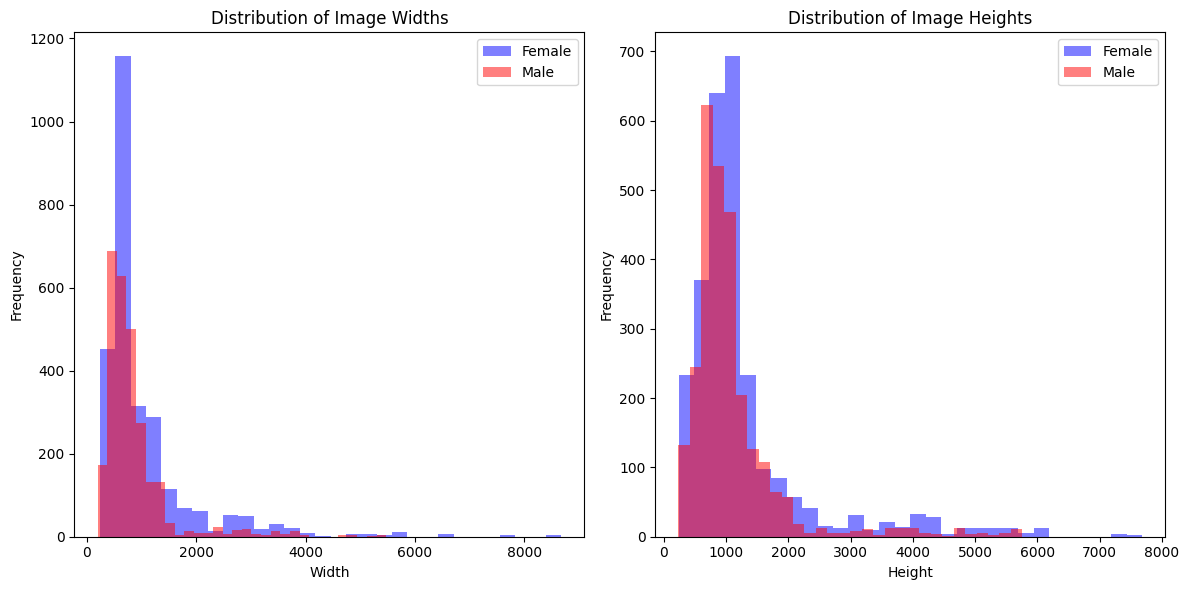

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directories
image_dirs = {
    'Female': os.path.join(dataset_dir, 'Female Faces'),
    'Male': os.path.join(dataset_dir, 'Male Faces')
}

# Initialize lists to store image sizes
widths = {'Female': [], 'Male': []}
heights = {'Female': [], 'Male': []}

# Iterate through both directories
for gender, image_dir in image_dirs.items():
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    for image_file in image_files:
        try:
            with Image.open(os.path.join(image_dir, image_file)) as img:
                widths[gender].append(img.width)
                heights[gender].append(img.height)
        except (OSError, UnidentifiedImageError) as e:
            print(f"Error processing {image_file}: {e}")

# Print the first few sizes to check
print("Female Widths:", widths['Female'][:5])
print("Female Heights:", heights['Female'][:5])
print("Male Widths:", widths['Male'][:5])
print("Male Heights:", heights['Male'][:5])

# Plot histogram of widths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths['Female'], bins=30, color='blue', alpha=0.5, label='Female')
plt.hist(widths['Male'], bins=30, color='red', alpha=0.5, label='Male')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram of heights
plt.subplot(1, 2, 2)
plt.hist(heights['Female'], bins=30, color='blue', alpha=0.5, label='Female')
plt.hist(heights['Male'], bins=30, color='red', alpha=0.5, label='Male')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


resize the images to an uniform size

In [ ]:
import os
from PIL import Image

def resize_images_in_directory(directory, target_size):
    for image_file in os.listdir(directory):
        file_path = os.path.join(directory, image_file)
        if os.path.isfile(file_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                with Image.open(file_path) as img:
                    # Convert image to RGB if it is RGBA or P mode
                    if img.mode in ("RGBA", "P"):
                        img = img.convert("RGB")

                    # Resize image
                    img_resized = img.resize(target_size)

                    # Save resized image
                    img_resized.save(file_path)  # Overwrite the original image or save as a new file
            except (OSError, UnidentifiedImageError) as e:
                print(f"Error processing {image_file}: {e}")

# Define directories
female_faces_dir = '/content/drive/MyDrive/datasets/images/Male and Female face dataset/Female Faces/'
male_faces_dir = '/content/drive/MyDrive/datasets/images/Male and Female face dataset/Male Faces/'

# Resize images in each directory
resize_images_in_directory(female_faces_dir, target_size=(224, 224))
resize_images_in_directory(male_faces_dir, target_size=(224, 224))


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Female Widths: [224, 224, 224, 224, 224]
Female Heights: [224, 224, 224, 224, 224]
Male Widths: [224, 224, 224, 224, 224]
Male Heights: [224, 224, 224, 224, 224]


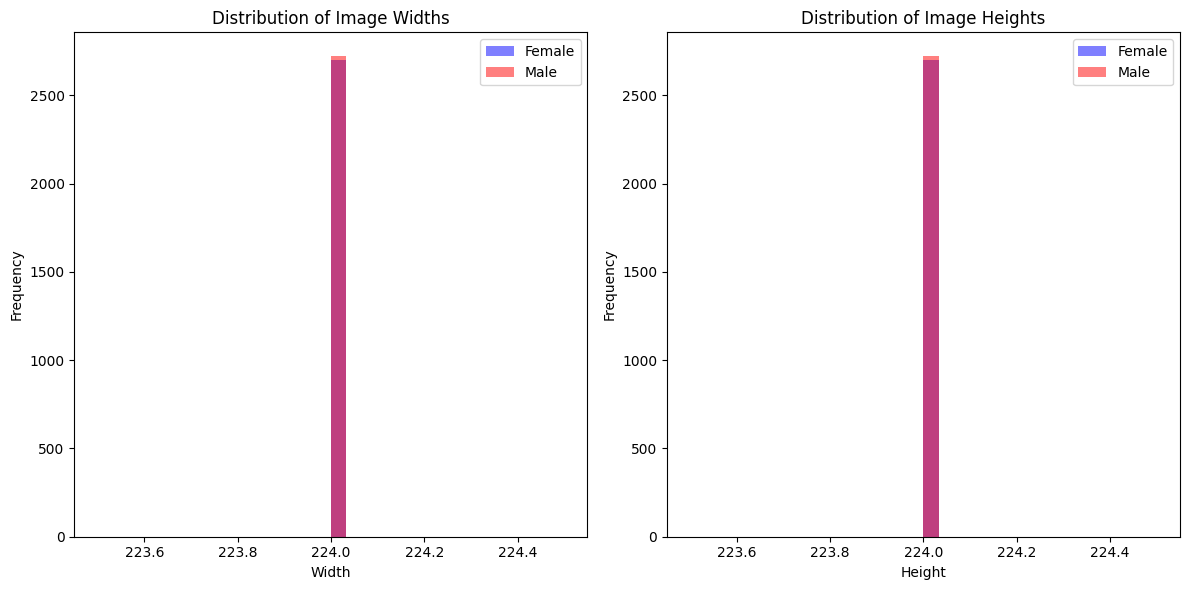

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directories
image_dirs = {
    'Female': os.path.join(dataset_dir, 'Female Faces'),
    'Male': os.path.join(dataset_dir, 'Male Faces')
}

# Initialize lists to store image sizes
widths = {'Female': [], 'Male': []}
heights = {'Female': [], 'Male': []}

# Iterate through both directories
for gender, image_dir in image_dirs.items():
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    for image_file in image_files:
        try:
            with Image.open(os.path.join(image_dir, image_file)) as img:
                widths[gender].append(img.width)
                heights[gender].append(img.height)
        except (OSError, UnidentifiedImageError) as e:
            print(f"Error processing {image_file}: {e}")

# Print the first few sizes to check
print("Female Widths:", widths['Female'][:5])
print("Female Heights:", heights['Female'][:5])
print("Male Widths:", widths['Male'][:5])
print("Male Heights:", heights['Male'][:5])

# Plot histogram of widths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths['Female'], bins=30, color='blue', alpha=0.5, label='Female')
plt.hist(widths['Male'], bins=30, color='red', alpha=0.5, label='Male')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram of heights
plt.subplot(1, 2, 2)
plt.hist(heights['Female'], bins=30, color='blue', alpha=0.5, label='Female')
plt.hist(heights['Male'], bins=30, color='red', alpha=0.5, label='Male')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


# Set Up Data Generators
You'll need to create data generators to load and preprocess the images for training and validation.





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for training and validation
train_dir = '/content/drive/MyDrive/datasets/images/Male and Female face dataset/'
validation_split = 0.2  # 20% of data for validation

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split  # Use for validation split
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split  # Use for validation split
)

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Use 'binary' for male/female classification
    subset='training'  # Use subset for training
)

validation_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Use 'binary' for male/female classification
    subset='validation'  # Use subset for validation
)


Found 4335 images belonging to 2 classes.
Found 1083 images belonging to 2 classes.


# Define Your CNN Model
You can use a simple CNN model or leverage a pre-trained model with transfer learning. Here’s an example using a pre-trained MobileNetV2:

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Train the Model
Train the model using the data generators:

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.8903 - loss: 0.2633 - val_accuracy: 0.9714 - val_loss: 0.0760
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9810 - loss: 0.0586 - val_accuracy: 0.9852 - val_loss: 0.0427
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9859 - loss: 0.0366 - val_accuracy: 0.9677 - val_loss: 0.0844
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9939 - loss: 0.0203 - val_accuracy: 0.9631 - val_loss: 0.0836
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9974 - loss: 0.0112 - val_accuracy: 0.9935 - val_loss: 0.0254
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9996 - loss: 0.0059 - val_accuracy: 0.9982 - val_loss: 0.0116
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9985 - loss: 0.0122 - val_accuracy: 0.9991 - val_loss: 0.0095
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.9997 - loss: 0.0032 - val_accuracy: 0.995

# Visualize Training History

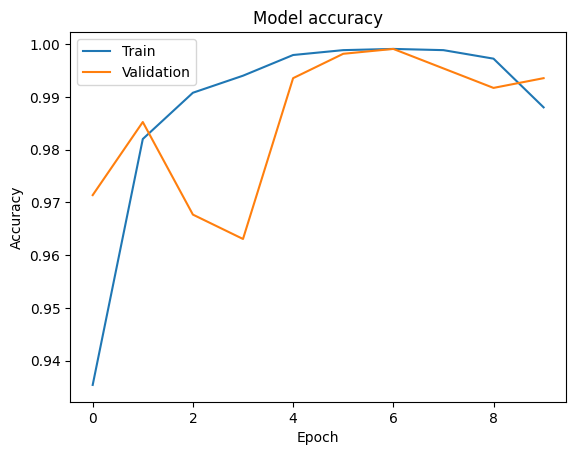

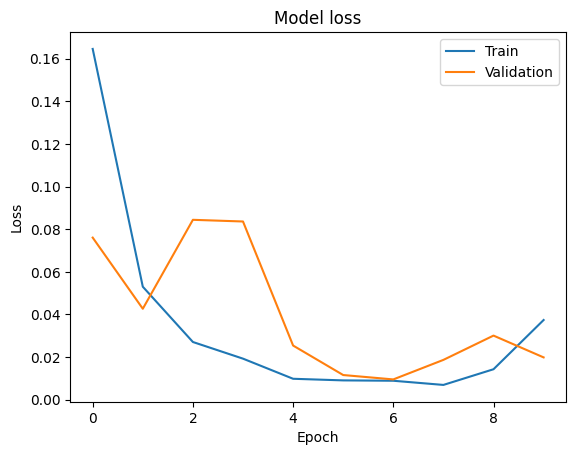

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


# Create Directory and Save Model

In [ ]:
# Save the model in .keras format

import os
from tensorflow.keras.models import load_model

# Define the directory and file path
model_dir = '/content/drive/MyDrive/datasets/models/'
model_file = 'girl_or_boy_face_identification.keras'

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save(os.path.join(model_dir, model_file))


Verify Directory Creation

In [ ]:
# List contents of the directory to verify
!ls /content/drive/MyDrive/datasets/models/


girl_or_boy_face_identification.keras


# testing the model

In [13]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Path to the saved model
model_path = '/content/drive/MyDrive/datasets/models/girl_or_boy_face_identification.keras'

# Load the model
try:
    model = load_model(model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")

# Path to the Female Faces directory
female_faces_dir = '/content/drive/MyDrive/datasets/images/Male and Female face dataset/Female Faces/'

# List all image files in the directory
female_images = [f for f in os.listdir(female_faces_dir) if os.path.isfile(os.path.join(female_faces_dir, f))]

# Select the first image from the list (or any other image)
if len(female_images) > 1000:
    selected_image = female_images[1000]
else:
    selected_image = female_images[0]  # Default to the first image if fewer than 1001 images

selected_image_path = os.path.join(female_faces_dir, selected_image)
print(f"Selected image: {selected_image}")

# Preprocess the image for prediction
def prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load the image and resize it
    img_array = image.img_to_array(img) / 255.0  # Convert image to an array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Make prediction
img_array = prepare_image(selected_image_path)
prediction = model.predict(img_array)

# Assuming a binary classification where output > 0.5 means Female
class_label = 'Female' if prediction[0] > 0.5 else 'Male'
print(f'The model predicts that the image is: {class_label}')


Model loaded successfully!
Selected image: 0 (1882).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The model predicts that the image is: Male
